In [1]:
import cloudberry.api as cb

In [2]:
# Define Cloudberry configuration
cb_port = 9000
cb_config = cb.CloudberryConfig(f'http://localhost:{cb_port}')

# Initialize selected API(s)
cb_data = cb.Data(cb_config)
cb_analytics = cb.Analytics(cb_config)
cb_buckets = cb.Buckets(cb_config)
cb_meta = cb.Metadata(cb_config)
cb_query = cb.Query(cb_config)
cb_uploader = cb.AgeFileUploader(cb_config)

In [ ]:
# cb.Data

import math
import datetime

get_current_timestamp = lambda: math.trunc(datetime.datetime.utcnow().timestamp())

current_time = get_current_timestamp()
data_points = [
    cb.DataPoint(time=current_time, fields={'version': 0.1}, tags={'origin': 'jupyter_notebook', 'type': 'api_demo'}),
    cb.DataPoint(time=current_time + 1, fields={'version': 0.2}, tags={'origin': 'jupyter_notebook', 'type': 'api_demo'}),
    cb.DataPoint(time=current_time + 2, fields={'version': 0.1}, tags={'origin': 'notebook', 'type': 'api_demo'}),
    cb.DataPoint(time=current_time + 3, fields={'version': 0.2}, tags={'origin': 'notebook', 'type': 'api_demo'}),
]

# Save data points explicitly
result = cb_data.save_data(data_points)
print(result)

# Get those data points with filters
result = cb_data.get_data(cb.DataFilters(tags={'origin': 'notebook'}))
print(len(result.data))

result = cb_data.get_data(cb.DataFilters(fields={'version': 0.1}))
print(len(result.data))

result = cb_data.get_data(cb.DataFilters(tags={'origin': 'notebook'}, fields={'version': 0.1}))
print(len(result.data), result.data)

# Delete data points
result = cb_data.get_data(cb.DataFilters(tags={'type': 'api_demo'}))
print('before: ', len(result.data))

result = cb_data.delete_data(cb.DataFilters(tags={'type': 'api_demo'}))
print(result)

result = cb_data.get_data(cb.DataFilters(tags={'type': 'api_demo'}))
print('after: ', len(result.data))

In [ ]:
# cb.Buckets

buckets_names = cb_buckets.get_buckets_names()
print(buckets_names)

result = cb_buckets.create_bucket('wiadro_0')
print(result)

buckets_names = cb_buckets.get_buckets_names()
print(buckets_names)

result = cb_buckets.delete_bucket('wiadro_0')
print(result)

buckets_names = cb_buckets.get_buckets_names()
print(buckets_names)

In [ ]:
# cb.Query

result = cb_query.query("""
from(bucket:"cloudberry-logs")
|> range(start: -1h)
|> filter(fn: (r) => r.type == "api_demo")
""", raw=True)
print(result)

In [4]:
# cb.AgeFileUploader

age_log_file_path = '../data/emas-20190412T120536.log'
age_log_experiment_name = 'EMAS_AGE'
age_log_headers_keys = {
    "[WH]": "[W]",
    "[SH]": "[S]",
    "[BH]": "[B]"
}

evaluation_id = cb_uploader.upload_file(
    file_name=age_log_file_path,
    experiment_name=age_log_experiment_name,
    details=cb.UploadDetails(headers_keys=age_log_headers_keys)
)
print(evaluation_id)


5f392561be38e132cdf873f8


In [24]:
# cb.Analytics

# Upload more data to Cloudberry
emas_files = [
    "../data/emas-20190411T232808.log",
    "../data/emas-20190411T234810.log",
    "../data/emas-20190412T000813.log",
    "../data/emas-20190412T120536.log",
]
evaluation_ids = []
for emas_file in emas_files:
    evaluation_id = cb_uploader.upload_file(
             file_name=emas_file,
             experiment_name=age_log_experiment_name,
             details=cb.UploadDetails(headers_keys=age_log_headers_keys)
         )
    evaluation_ids.append(evaluation_id)

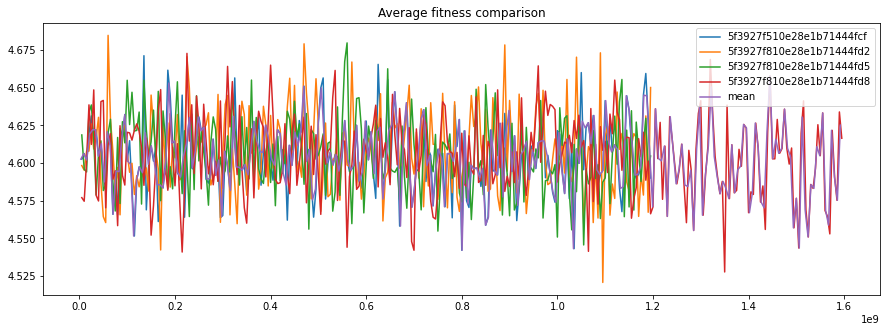

In [25]:
best_fitness_field = 'BEST_SOLUTION_SO_FAR'
fitness_field = 'AVERAGE_FITNESS'

# Use case 1. Compare multiple evaluations by their ids

series = cb_analytics.compare_evaluations(
    evaluation_ids=evaluation_ids,
    compared_field=fitness_field
)

cb.DataSeriesPlots.compare(series=series, 
                           x_field='_time', 
                           y_field=fitness_field,
                           title='Average fitness comparison')

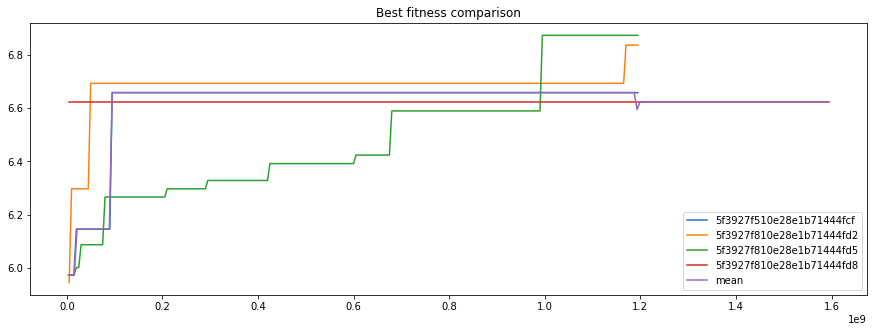

In [26]:
series = cb_analytics.compare_evaluations(
    evaluation_ids=evaluation_ids,
    compared_field=best_fitness_field
)

cb.DataSeriesPlots.compare(series=series, 
                           x_field='_time', 
                           y_field=best_fitness_field,
                           title='Best fitness comparison')

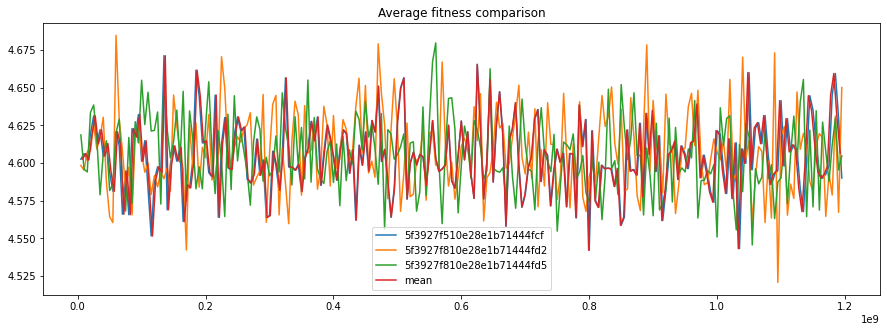

In [28]:
CONFIGURATION_ID = '5f3927f510e28e1b71444fce'

# Use case 2. Compare all evaluations for given configuration id

series = cb_analytics.compare_evaluations_for_configuration(
    configuration_id=CONFIGURATION_ID,
    compared_field=fitness_field
)

cb.DataSeriesPlots.compare(series=series, 
                           x_field='_time', 
                           y_field=fitness_field,
                           title='Average fitness comparison')

In [ ]:
configuration_ids = [
    CONFIGURATION_ID,
    '5f3927f810e28e1b71444fd7'
]

# Use case 3. Compare N configurations

series = cb_analytics.compare_configurations(
    configuration_ids=configuration_ids,
    compared_field=fitness_field
)

cb.DataSeriesPlots.compare(series=series, 
                           x_field='_time', 
                           y_field=fitness_field,
                           title='Average fitness comparison')

In [ ]:
# Use case 4. Compare all configurations for experiment

series = cb_analytics.compare_configurations_for_experiment(
    experiment_name=age_log_experiment_name,
    compared_field=fitness_field
)

cb.DataSeriesPlots.compare(series=series, 
                           x_field='_time', 
                           y_field=fitness_field,
                           title='Average fitness comparison')

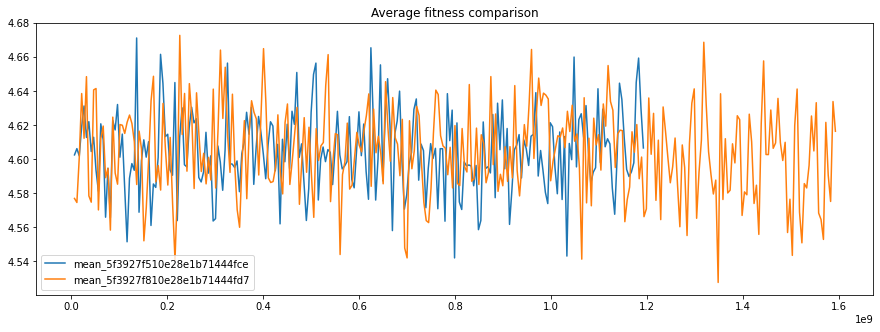

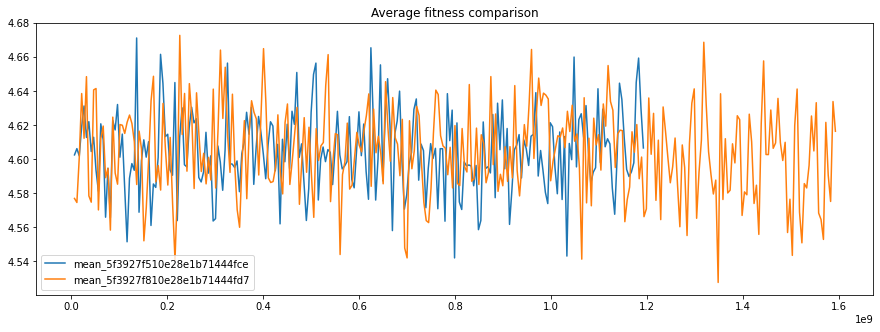

In [30]:
# Use case 4. Compare all configurations for experiment

series = cb_analytics.compare_configurations_for_experiment(
    experiment_name=age_log_experiment_name,
    compared_field=fitness_field
)

cb.DataSeriesPlots.compare(series=series, 
                           x_field='_time', 
                           y_field=fitness_field,
                           title='Average fitness comparison')